# Explore here

In [2]:
import pandas as pd

df_diabetes = pd.read_csv ('/Users/luiseduardogarciablanco/Desktop/bootcamp/random forest/Random_Forest/src/diabetes.csv')
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Descripcion de las columnas del DataFrame:

Pregnancies. Número de embarazos del paciente (numérico)
Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)
SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
BMI. Índice de masa corporal (numérico)
DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)
Age. Edad del paciente (numérico)
Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

In [2]:
df_diabetes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Resumen estadístico
print(df_diabetes.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

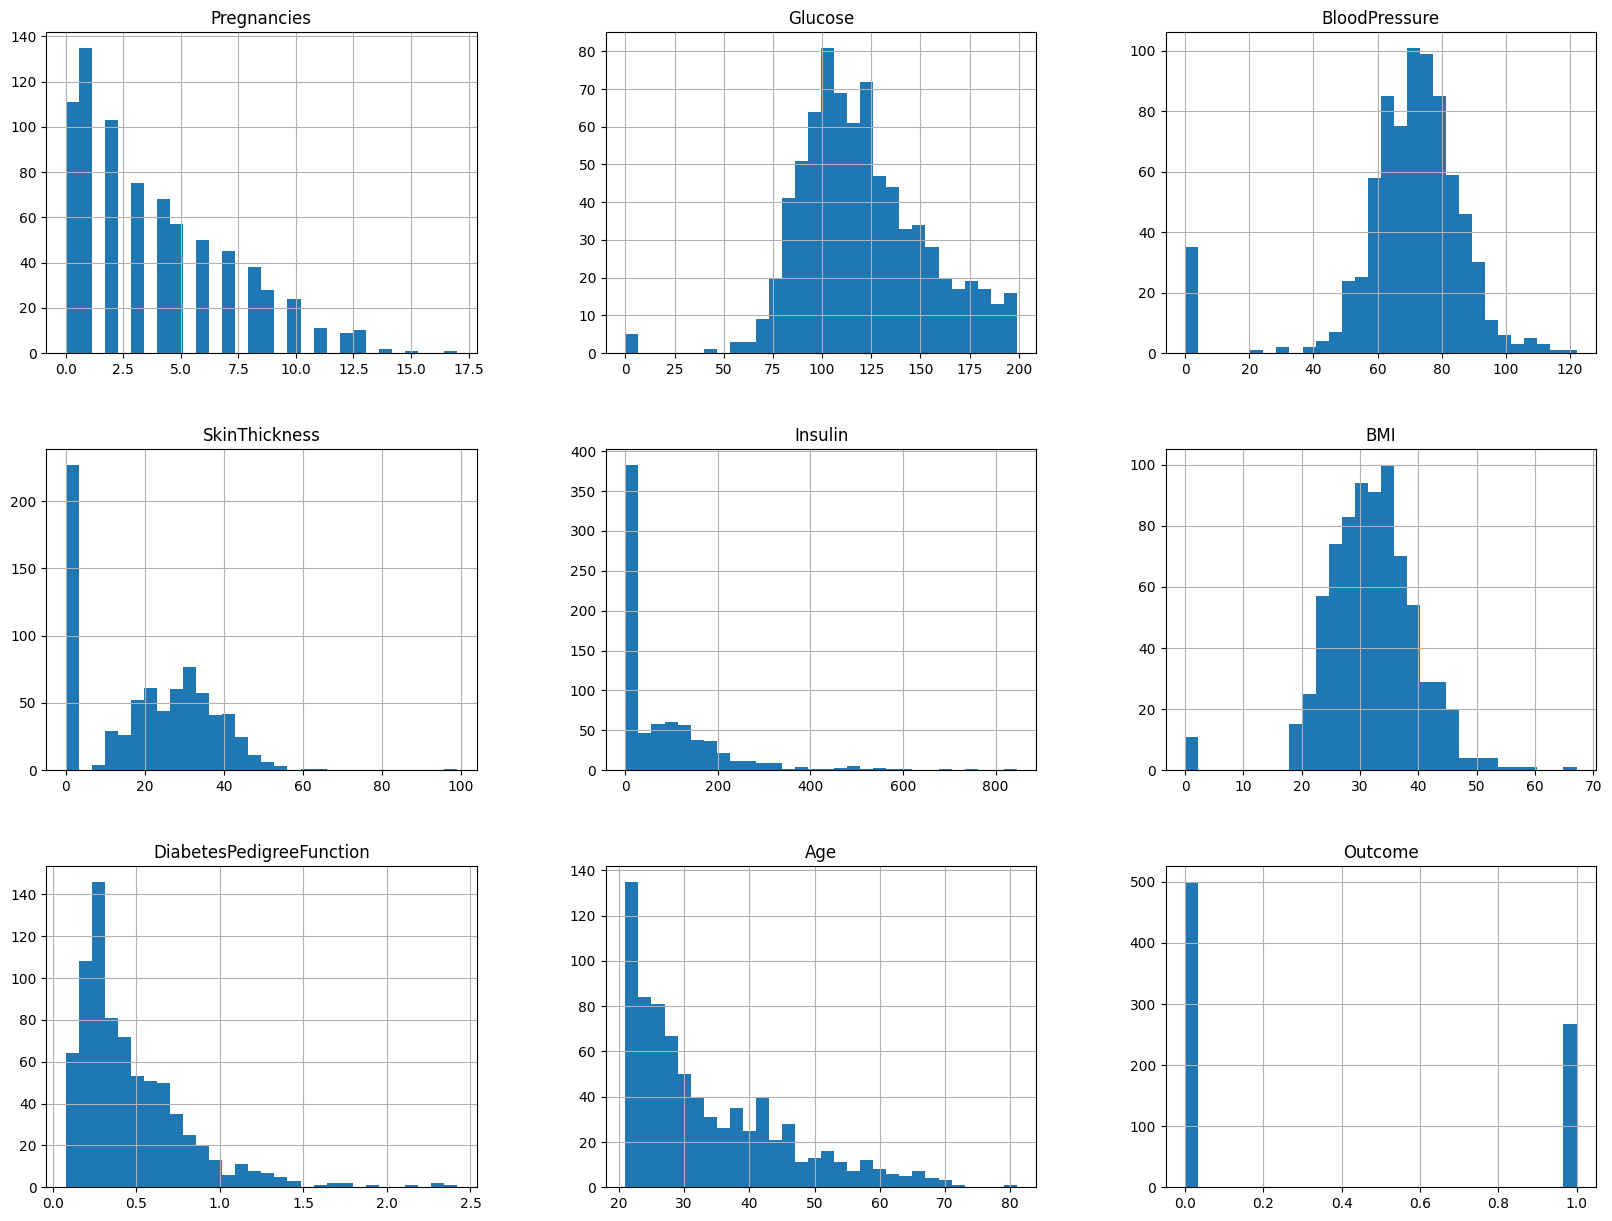

In [3]:
import matplotlib.pyplot as plt

# Crear histogramas para cada columna
df_diabetes.hist(bins=30, figsize=(20, 15))
plt.show()


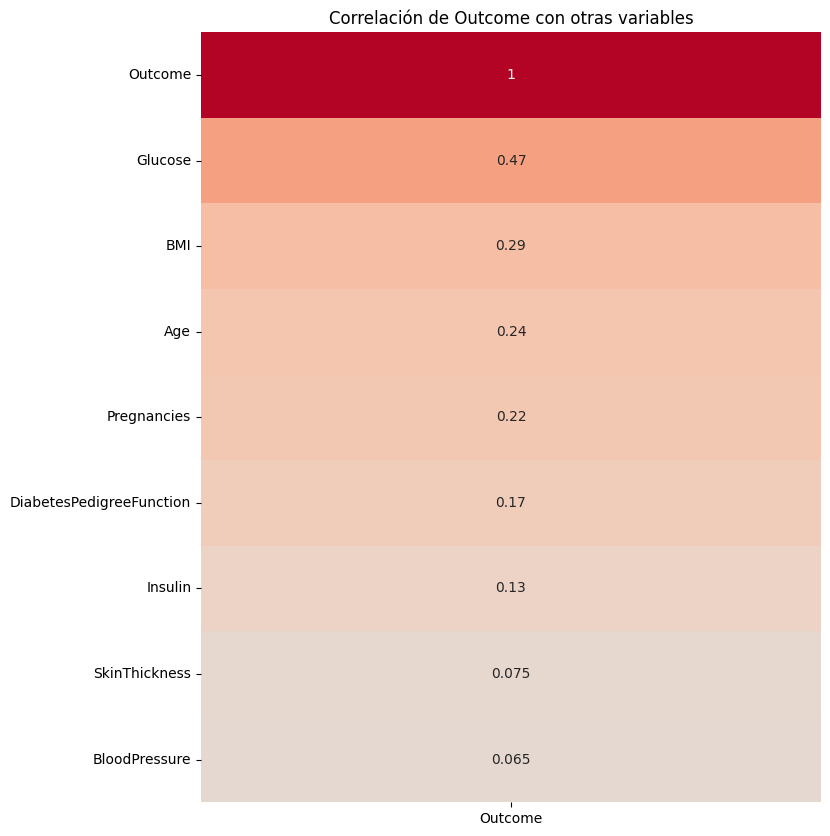

In [9]:

import seaborn as sns


# Calcular la matriz de correlación
correlation_matrix = df_diabetes.corr()

# Seleccionar la correlación con la columna 'Outcome'
outcome_correlation = correlation_matrix[['Outcome']].sort_values(by='Outcome', ascending=False)

# Crear un mapa de calor solo para la correlación con 'Outcome'
plt.figure(figsize=(8, 10))
sns.heatmap(outcome_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)

# Mostrar el gráfico
plt.title('Correlación de Outcome con otras variables')
plt.show()

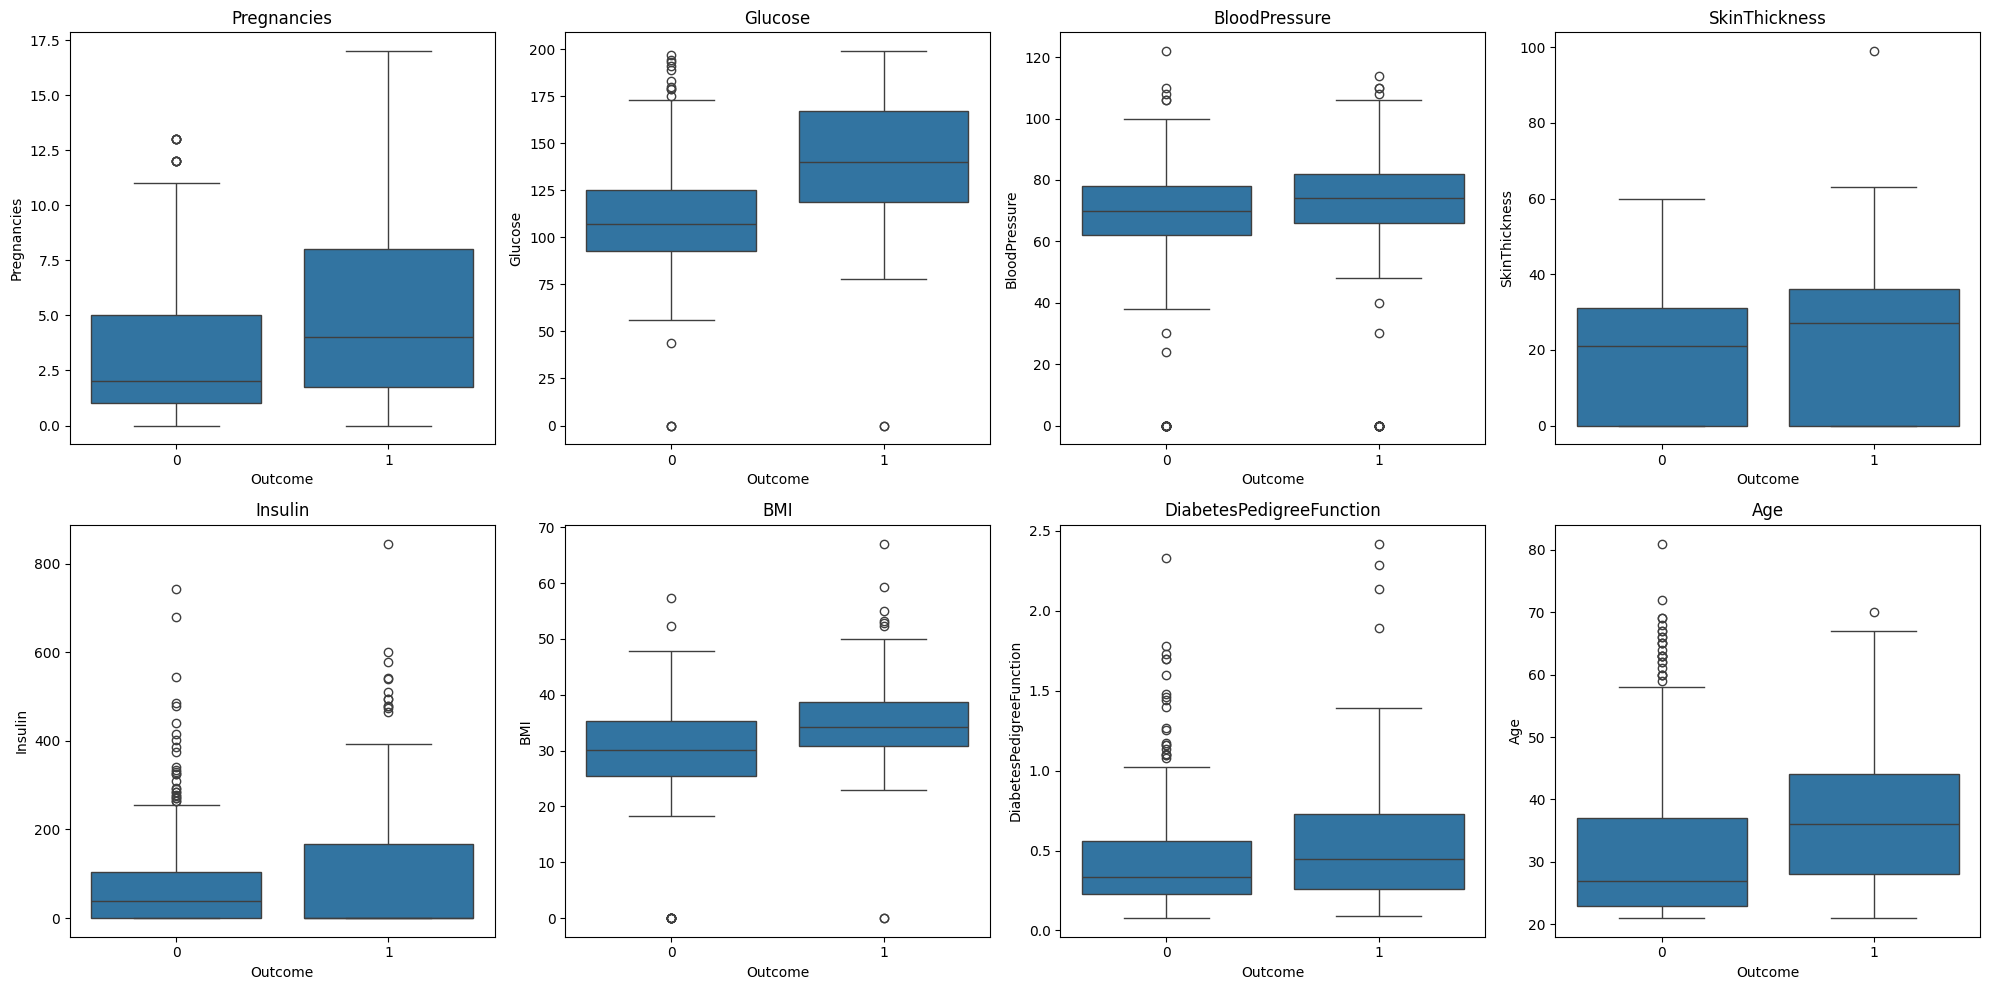

In [7]:
# Boxplots para comparar características
plt.figure(figsize=(20, 10))

for i, column in enumerate(df_diabetes.columns[:-1], 1):  # Excluimos 'Outcome'
    plt.subplot(2, 4, i)
    sns.boxplot(x='Outcome', y=column, data=df_diabetes)
    plt.title(column)

plt.tight_layout()
plt.show()

Con el EDA terminado empezamos a aplicar un Desicion Tree para entrenar el modelo de prediccion 

In [5]:
# Separar características y variable objetivo
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from pickle import dump 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [10]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape},{y_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape},{y_test.shape}')

Tamaño del conjunto de entrenamiento: (614, 8),(614,)
Tamaño del conjunto de prueba: (154, 8),(154,)


In [22]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'random_state': [42]
}

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Crear el modelo de Random Forest
rf_model = RandomForestClassifier()

# Crear el objeto GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajustar el modelo a los datos
grid_search_rf.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Mejores parámetros encontrados:")
print(grid_search_rf.best_params_)

# Evaluar el modelo en el conjunto de prueba
best_rf_model = grid_search_rf.best_estimator_
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud en el conjunto de prueba: {accuracy:.4f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

# Informe de clasificación
class_report = classification_report(y_test, y_pred)
print('Informe de Clasificación:')
print(class_report)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 9720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2130 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python

Mejores parámetros encontrados:
{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300, 'random_state': 42}
Exactitud en el conjunto de prueba: 0.7532
Matriz de Confusión:
[[78 21]
 [17 38]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



In [28]:
# Crear el modelo Random Forest
rf_model = RandomForestClassifier(bootstrap= True, criterion= 'gini', max_depth= None, max_features='log2', min_samples_leaf= 2, min_samples_split= 10, n_estimators= 300, random_state= 42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=300, random_state=42)

In [32]:
# Hacer predicciones con el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154


Confusion Matrix:
 [[78 21]
 [17 38]]


In [29]:
# predicción
y_pred_test = rf_model.predict(X_test)
y_pred_test

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [30]:
y_pred_train = rf_model.predict(X_train)
y_pred_train

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,

In [31]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)


Accuracy Test:  0.7532467532467533
F1 score Test:  0.7532467532467533
Precision Test:  0.7532467532467533
Recall Test:  0.7532467532467533
Accuracy Train:  0.9429967426710097
F1 score Train:  0.9429967426710097
Precision Train:  0.9429967426710097
Recall Train:  0.9429967426710097
